In [ ]:
# Step 1: Uninstall the current version of TensorFlow
!pip uninstall -y tensorflow

# Step 2: Install the specific version of TensorFlow (2.15.x)
!pip install tensorflow==2.15.0


Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Successfully uninstalled tensorflow-2.17.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.1 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ashenafifasilkebede/dataset")

print("Path to dataset files:", path)

100%|██████████| 2.93G/2.93G [00:36<00:00, 86.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ashenafifasilkebede/dataset/versions/1


In [ ]:
import pandas as pd
import os

# Path to the dataset files
dataset_path = '/root/.cache/kagglehub/datasets/ashenafifasilkebede/dataset/versions/1'

# List the contents of the dataset directory to find the relevant files
files = os.listdir(dataset_path)
print("Files in the dataset directory:", files)

Files in the dataset directory: ['val', 'test', 'train']


In [ ]:
train_path = os.path.join(dataset_path, 'train')
val_path = os.path.join(dataset_path, 'val')
test_path = os.path.join(dataset_path, 'test')

In [ ]:
labels = os.listdir(val_path)
print(labels)

['OSCC', 'Normal']


In [ ]:
data_path = os.path.join(dataset_path, 'data')  # Assuming you want to create a subdirectory under your dataset path

# Check if the directory exists, if not, create it
if not os.path.exists(data_path):
    os.mkdir(data_path)
    print(f"Directory '{data_path}' created successfully!")
else:
    print(f"Directory '{data_path}' already exists.")

Directory '/root/.cache/kagglehub/datasets/ashenafifasilkebede/dataset/versions/1/data' created successfully!


In [ ]:
files = os.listdir(dataset_path)
print("Files in the dataset directory:", files)

Files in the dataset directory: ['val', 'test', 'data', 'train']


In [ ]:
normal_data_path = os.path.join(data_path, 'Normal')
oscc_data_path = os.path.join(data_path, 'OSCC')

# Create the 'Normal' directory if it doesn't exist
if not os.path.exists(normal_data_path):
    os.mkdir(normal_data_path)
    print(f"Directory '{normal_data_path}' created successfully!")
else:
    print(f"Directory '{normal_data_path}' already exists.")

# Create the 'OSCC' directory if it doesn't exist
if not os.path.exists(oscc_data_path):
    os.mkdir(oscc_data_path)
    print(f"Directory '{oscc_data_path}' created successfully!")
else:
    print(f"Directory '{oscc_data_path}' already exists.")

Directory '/root/.cache/kagglehub/datasets/ashenafifasilkebede/dataset/versions/1/data/Normal' created successfully!
Directory '/root/.cache/kagglehub/datasets/ashenafifasilkebede/dataset/versions/1/data/OSCC' created successfully!


In [ ]:
import cv2

In [ ]:
def move_data(d_path, saved_path):
    for i in labels:
        images = os.listdir(d_path + '/' + i)
        for j in images:
            path = d_path +'/' + i
            img = cv2.imread(path + '/' + j)
            s_path = saved_path + '/' + i + '/' + j
            cv2.imwrite(s_path, img)

In [ ]:
move_data(train_path, data_path)

In [ ]:
c_norm_path = len(os.listdir(data_path + '/' + labels[0]))
c_oscc_path = len(os.listdir(data_path + '/' + labels[1]))
print(c_norm_path+c_oscc_path)

4946


In [ ]:
move_data(val_path, data_path)

In [ ]:
move_data(test_path, data_path)

In [ ]:
c_norm_path = len(os.listdir(data_path + '/' + labels[0]))
c_oscc_path = len(os.listdir(data_path + '/' + labels[1]))
print(c_norm_path+c_oscc_path)

5192


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import shutil

# Define the path in Google Drive where you want to save the dataset
drive_data_path = '/content/drive/My Drive/ColabData/dataset'

# Create the directory if it doesn't exist
if not os.path.exists(drive_data_path):
    os.makedirs(drive_data_path)
    print(f"Directory '{drive_data_path}' created successfully!")
else:
    print(f"Directory '{drive_data_path}' already exists.")


Directory '/content/drive/My Drive/ColabData/dataset' already exists.


In [ ]:
# Define your current dataset path

# Copy the dataset to Google Drive1
shutil.copytree(data_path, drive_data_path, dirs_exist_ok=True) # Add dirs_exist_ok=True

print(f"Dataset successfully copied to {drive_data_path}")

Dataset successfully copied to /content/drive/My Drive/ColabData/dataset


In [ ]:
def count_files_in_directory(directory):
    file_count = 0
    for root, dirs, files in os.walk(directory):
        file_count += len(files)
    return file_count

In [ ]:
# Define your Google Drive dataset path
drive_data_path = '/content/drive/My Drive/ColabData/dataset'

# Count files in the Google Drive dataset
drive_file_count = count_files_in_directory(drive_data_path)
print(f"Number of files in the copied dataset (Google Drive): {drive_file_count}")

Number of files in the copied dataset (Google Drive): 5192


In [ ]:
def main(train_data_path):

    """
    return training and testing dataframes including 2 columns image path and its label

    Args:
      train_data_path (string): string includes your train data path
      test_data_path (string): string includes your test data path
      note: data_path argument must contains your classes dirs

    Returns:
      train_df (dataframe):  It consists of two columns (the path of the image and its label) and contains records of the path of the training images and the label of each image
      test_df (dataframe):  It consists of two columns (the path of the image and its label) and contains records of the path of the testing images and the label of each image

    """

    for dirs in [train_data_path]:

        filepaths = []
        labels = []
        classes_list = sorted(os.listdir(dirs))

        filepaths,labels = get_fileList(classes_list, dirs, filepaths, labels)

        train_df = obtain_train_df(filepaths, labels)


    return train_df



def get_fileList(classes_list, dirs, filepaths, labels):


    """
    return file paths list including all full image paths and label for each one

    Args:
      classes_list (list): list includes name of classes dirs
      dirs (string): the data path
      filepaths (list): empty list to fill with images paths later
      labels (list): empty list to fill with each image label later

    Returns:
      count (scalar):  number of images in your dataset
    """


    for s_class in classes_list:

        label = s_class
        classpath = os.path.join(dirs, s_class)
        flist = sorted(os.listdir(classpath))

        store_image_names_and_its_labels(flist, classpath, filepaths, labels, label)

    return filepaths, labels


def store_image_names_and_its_labels(flist, classpath, filepaths, labels, label):

    """
    return nothing, it fills the filepaths list with all the images paths and its labels

    Args:
      flist (list) : contains all the image names in certain class
      classes_list (list): list includes name of classes dirs
      filepaths (list): stores all the images paths
      labels (list): stores the label of each image in the dataset
      label (string): label for a specific image

    Returns:
      nothing
    """


    for file in flist:
        file_path = os.path.join(classpath, file)
        filepaths.append(file_path)
        labels.append(label)



def obtain_train_df(filepaths, labels):

    """
    Return Dataframe with 2 columns contains each image path with its label

    Args:
      filepaths (list): stores all the images paths
      labels (list): stores the label of each image in the dataset

    Returns:
      train_df (DataFrame):  Dataframe with 2 columns contains each image path with its label
    """

    train_df =pd.DataFrame({
        'image_path' : filepaths,
        'label' : labels
    })
    return train_df

In [ ]:
import pandas as pd
data_df = main(data_path)
data_df.head()

image_path   label
0  /root/.cache/kagglehub/datasets/ashenafifasilk...  Normal
1  /root/.cache/kagglehub/datasets/ashenafifasilk...  Normal
2  /root/.cache/kagglehub/datasets/ashenafifasilk...  Normal
3  /root/.cache/kagglehub/datasets/ashenafifasilk...  Normal
4  /root/.cache/kagglehub/datasets/ashenafifasilk...  Normal

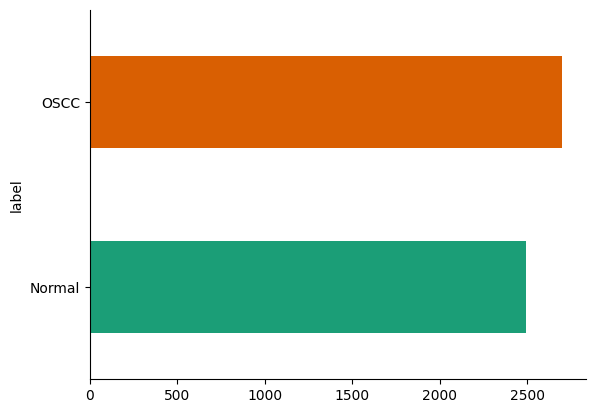

In [ ]:
# @title label

from matplotlib import pyplot as plt
import seaborn as sns
data_df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
print("Shape of the dataset: ", data_df.shape)
print("\n")
print("_______________________________________")
print("Number of null values: ")
print(data_df.isnull().sum())
print("\n")
print("_______________________________________")
print("Number of unique values: ")
print(data_df.nunique())


Shape of the dataset:  (5192, 2)


_______________________________________
Number of null values: 
image_path    0
label         0
dtype: int64


_______________________________________
Number of unique values: 
image_path    5192
label            2
dtype: int64


In [ ]:
import os
import time
import shutil
import pathlib
import itertools

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
#import missingno as msno
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras import callbacks
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


In [ ]:
# Generate data paths with labels
def define_paths(dir):

    filepaths = []
    labels = []

    folds = os.listdir(dir)
    for fold in folds:
        foldpath = os.path.join(dir, fold)
        filelist = os.listdir(foldpath)
        for file in filelist:
            fpath = os.path.join(foldpath, file)
            filepaths.append(fpath)
            labels.append(fold)

    return filepaths, labels


# Concatenate data paths with labels into one dataframe ( to later be fitted into the model )
def define_df(files, classes):
    Fseries = pd.Series(files, name= 'filepaths')
    Lseries = pd.Series(classes, name='labels')
    return pd.concat([Fseries, Lseries], axis= 1)

In [ ]:
# Function that contain only a directory of data and it is not splitted
def tr_ts_data(tr_dir, ts_dir):
    # train and valid dataframe
    files, classes = define_paths(tr_dir)
    df = define_df(files, classes)
    strat = df['labels']
    train_df, valid_df = train_test_split(df, train_size= 0.7, shuffle= True, random_state= 123, stratify= strat)

    # test dataframe
    files, classes = define_paths(tr_dir)
    test_df = define_df(files, classes)
    return train_df, valid_df, test_df

# Function that contain train and test directory of data.
def full_data(data_dir):
    # train dataframe
    files, classes = define_paths(data_dir)
    df = define_df(files, classes)
    strat = df['labels']
    train_df, dummy_df = train_test_split(df,  train_size= 0.7, shuffle= True, random_state= 123, stratify= strat)

    # valid and test dataframe
    strat = dummy_df['labels']
    valid_df, test_df = train_test_split(dummy_df,  train_size= 0.5, shuffle= True, random_state= 123, stratify= strat)

    return train_df, valid_df, test_df


# function that contain the three directory of data train, valid, and test
def tr_val_ts_data(tr_dir, val_dir, ts_dir):

    # train dataframe
    files, classes = define_paths(tr_dir)
    train_df = define_df(files, classes)

    # validation dataframe
    files, classes = define_paths(val_dir)
    valid_df = define_df(files, classes)

    # test dataframe
    files, classes = define_paths(ts_dir)
    test_df = define_df(files, classes)

    return train_df, valid_df, test_df

In [ ]:
def split_data(tr_dir, val_dir=None, ts_dir=None):
    '''
        This function split data into train, valid, and test after convert it to a dataframe.
        Dataset can be in several formats, it can contain train, valid, and test data, or it can contain only train and test data, etc.
        It depends on other needed function:
        - full_data function that contain only a directory of data and it is not splitted.
        - tr_ts_data function that contain train and test directory of data.
        - tr_val_ts_data function that contain the three directory of data train, valid, and test.
    '''

    # No Validation or Test data
    if val_dir == '' and ts_dir == '':
        train_df, valid_df, test_df = full_data(tr_dir)
        return train_df, valid_df, test_df

    # No Validation data
    elif val_dir == '' and ts_dir != '':
        train_df, valid_df, test_df = tr_ts_data(tr_dir, ts_dir)
        return train_df, valid_df, test_df

    # All data existed
    elif val_dir != '' and ts_dir != '':
        train_df, valid_df, test_df = tr_val_ts_data(tr_dir, val_dir, ts_dir)
        return train_df, valid_df, test_df

In [ ]:
def create_model_data (train_df, valid_df, test_df, batch_size):
    '''
    This function takes train, validation, and test dataframe and fit them into image data generator, because model takes data from image data generator.
    Image data generator converts images into tensors. '''


    # define model parameters
    img_size = (224, 224)
    channels = 3 # either BGR or Grayscale
    color = 'rgb'
    img_shape = (img_size[0], img_size[1], channels)

    # Recommended : use custom function for test data batch size, else we can use normal batch size.
    ts_length = len(test_df)
    test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
    test_steps = ts_length // test_batch_size

    # This function which will be used in image data generator for data augmentation, it just take the image and return it again.
    def scalar(img):
        return img

    tr_gen = ImageDataGenerator(preprocessing_function= scalar,
                                horizontal_flip= True,
)

    ts_gen = ImageDataGenerator(preprocessing_function= scalar)

    train_gen = tr_gen.flow_from_dataframe( train_df,
                                           x_col= 'filepaths',
                                           y_col= 'labels',
                                           target_size= img_size,
                                           class_mode= 'categorical',
                                           color_mode= color,
                                           shuffle= True,
                                           batch_size= batch_size)

    valid_gen = ts_gen.flow_from_dataframe( valid_df,
                                           x_col= 'filepaths',
                                           y_col= 'labels',
                                           target_size= img_size,
                                           class_mode= 'categorical',
                                           color_mode= color,
                                           shuffle= True,
                                           batch_size= batch_size)

    # Note: we will use custom test_batch_size, and make shuffle= false
    test_gen = ts_gen.flow_from_dataframe( test_df,
                                          x_col= 'filepaths',
                                          y_col= 'labels',
                                          target_size= img_size,
                                          class_mode= 'categorical',
                                          color_mode= color,
                                          shuffle= False,
                                          batch_size= test_batch_size)

    return train_gen, valid_gen, test_gen

In [ ]:
def show_images(gen):
    '''
    This function take the data generator and show sample of the images
    '''

    # return classes , images to be displayed
    g_dict = gen.class_indices        # defines dictionary {'class': index}
    classes = list(g_dict.keys())     # defines list of dictionary's kays (classes), classes names : string
    images, labels = next(gen)        # get a batch size samples from the generator

    # calculate number of displayed samples
    length = len(labels)        # length of batch size
    sample = min(length, 25)    # check if sample less than 25 images

    plt.figure(figsize= (20, 20))

    for i in range(sample):
        plt.subplot(5, 5, i + 1)
        image = images[i] / 255       # scales data to range (0 - 255)
        plt.imshow(image)
        index = np.argmax(labels[i])  # get image index
        class_name = classes[index]   # get class of image
        plt.title(class_name, color= 'blue', fontsize= 12)
        plt.axis('off')
    plt.show()

In [ ]:
def plot_training(hist):
    '''
    This function take training model and plot history of accuracy and losses with the best epoch in both of them.
    '''

    # Define needed variables
    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'

    # Plot training history
    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')

    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout
    plt.show()

In [ ]:
train_dir = data_path
valid_dir = ""
test_dir = ""

try:
    # Get splitted data
    train_df, valid_df, test_df = split_data(train_dir, valid_dir, test_dir)

    # Get Generators
    batch_size = 128
    train_gen, valid_gen, test_gen = create_model_data(train_df, valid_df, test_df, batch_size)

except:
    print('Invalid Input')

Found 3634 validated image filenames belonging to 2 classes.
Found 779 validated image filenames belonging to 2 classes.
Found 779 validated image filenames belonging to 2 classes.


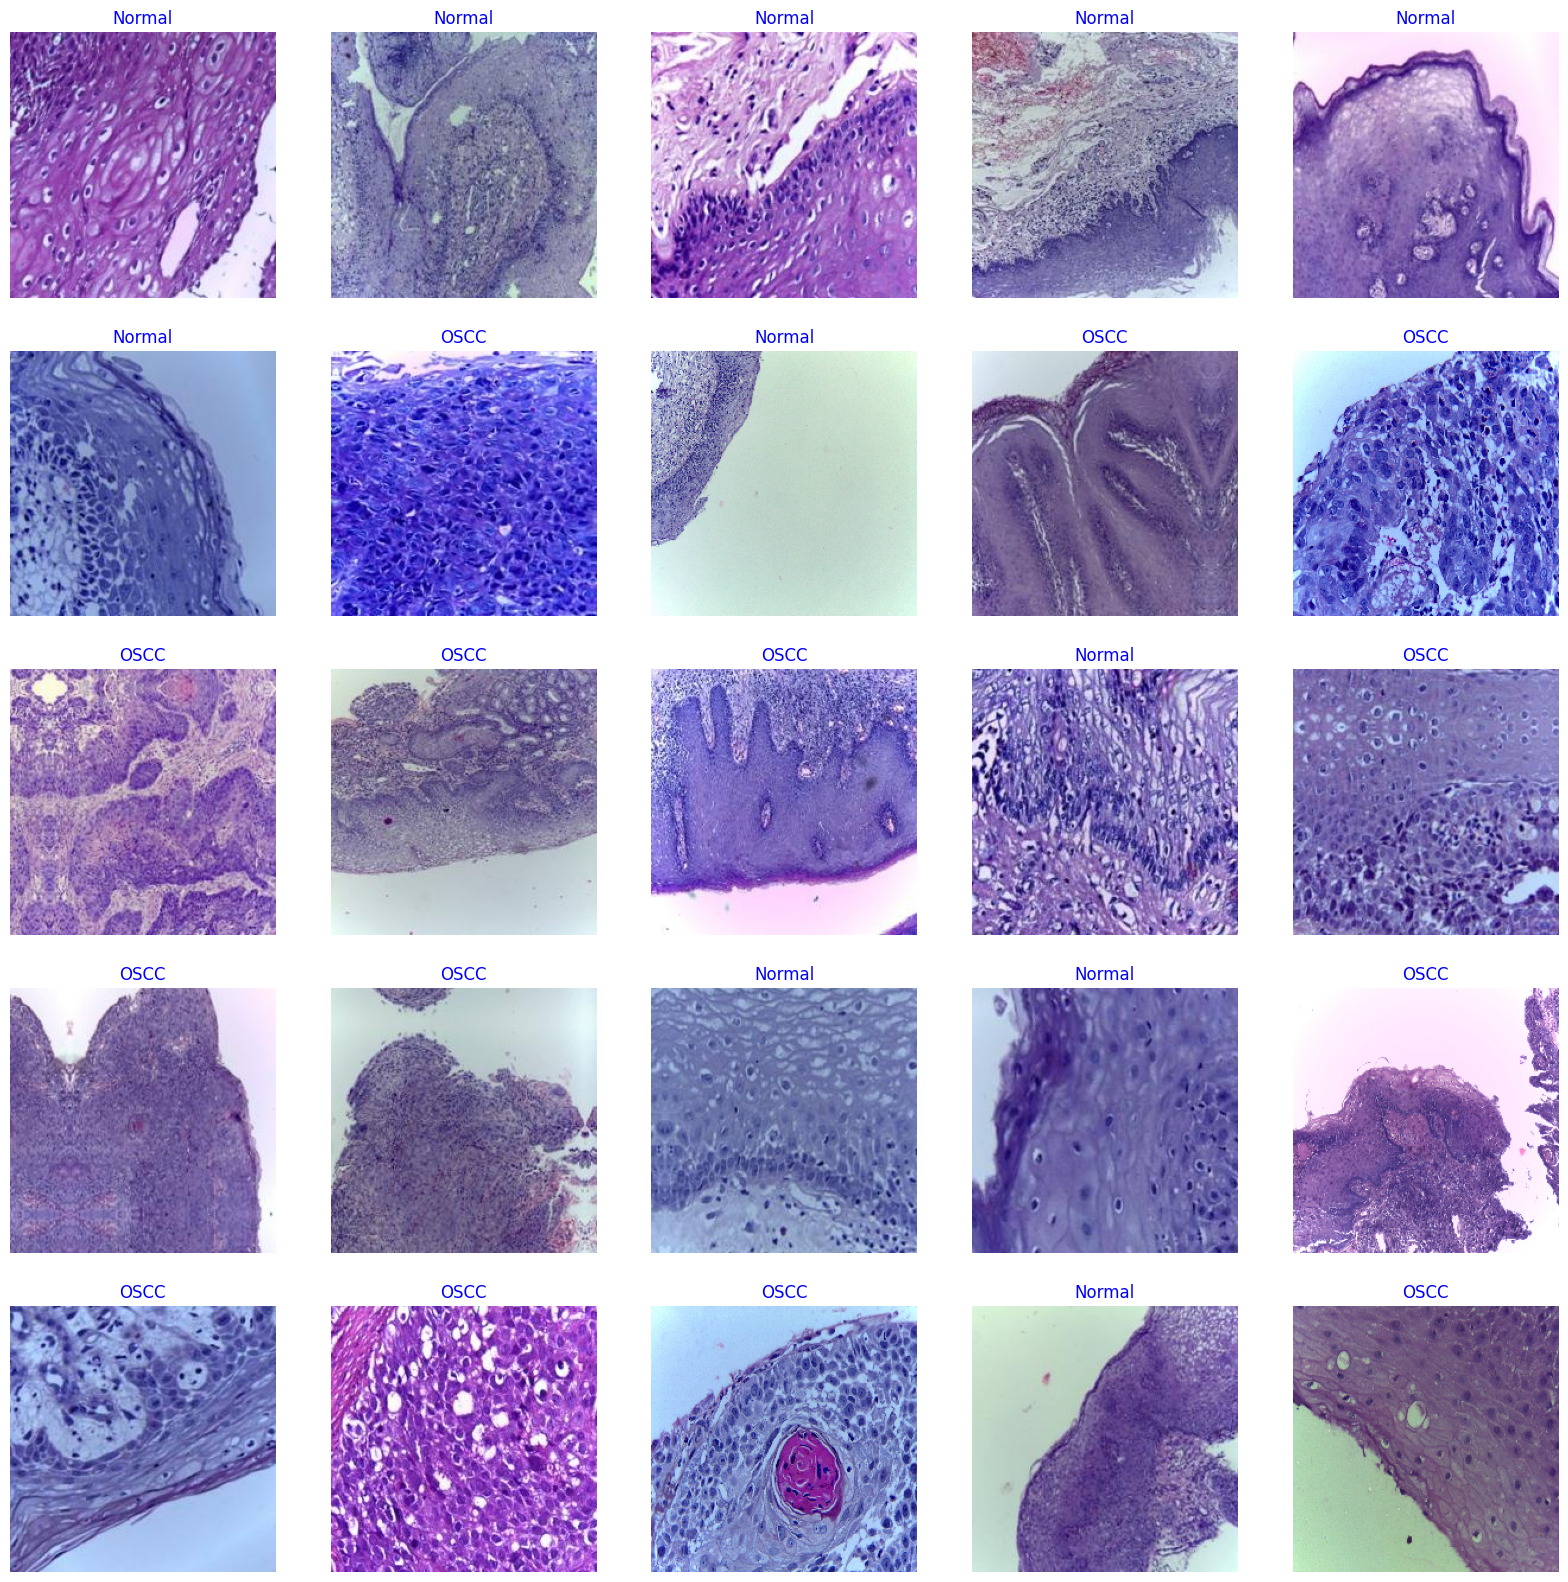

In [ ]:
show_images(train_gen)

In [ ]:
# Check if generators are working
sample_batch = next(train_gen)
images, labels = sample_batch
print("Image batch shape:", images.shape)
print("Label batch shape:", labels.shape)


Image batch shape: (128, 224, 224, 3)
Label batch shape: (128, 2)


# **Here we are creating both efficient net and resnet 50 model ,and try ensembling them**

\$ EfficientNetB3 Model

In [ ]:
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

# create pre-trained model (you can built on pretrained model such as :  efficientnet, VGG , Resnet )
# we will use efficientnetb3 from EfficientNet family.
base_model = tf.keras.applications.efficientnet.EfficientNetB3(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')

efficentNet_model = Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(256, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    Dropout(rate= 0.45, seed= 123),
    Dense(class_count, activation= 'softmax')
])

efficentNet_model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

efficentNet_model.summary()

43941136/43941136 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 1536)              10783535  
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 1536)              6144      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 256)               393472    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                         

In [ ]:
from tensorflow.keras.layers import Input, BatchNormalization, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adamax

\$ ResNet-50

In [ ]:
# Assuming you have a ResNet-50 base model
base_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=img_shape, pooling='max')

# Freeze the layers in the base model
for layer in base_resnet50.layers:
    layer.trainable = False

# Build the ResNet-50 model
resnet50_model = Sequential([
    base_resnet50,
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(class_count, activation='softmax')
])

# Compile the ResNet-50 model
resnet50_model.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
resnet50_model.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 batch_normalization_1 (Bat  (None, 2048)              8192      
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 256)               524544    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                 514       
                                                                 
Total params: 24120962 (92.01 MB)
Trainable params: 529

\$ DenseNet121

In [ ]:
from tensorflow.keras.applications import DenseNet121

# Load DenseNet121 model without the top layers
base_model = DenseNet121(include_top=False, weights='imagenet', input_shape=img_shape)

# Create your model structure
densenet_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    BatchNormalization(axis=-1),
    Dense(256, activation='relu'),
    Dropout(0.45),
    Dense(class_count, activation='softmax')
])

densenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
densenet_model.summary()


29084464/29084464 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d (  (None, 1024)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 batch_normalization_2 (Bat  (None, 1024)              4096      
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 256)               262400    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                       

\$ InceptionV3

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout, GlobalAveragePooling2D

# Load InceptionV3 model without the top layers
base_model = InceptionV3(include_top=False, weights='imagenet', input_shape=img_shape)

# Create your model structure
inception_model = Sequential([
    base_model,
    GlobalAveragePooling2D(), # Add GlobalAveragePooling2D to flatten the output
    BatchNormalization(axis=-1),
    Dense(256, activation='relu'),
    Dropout(0.45),
    Dense(class_count, activation='softmax')
])

# Compile the model
inception_model.compile(
    optimizer='adam',  # You can choose a different optimizer if needed
    loss='categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' if you have integer labels
    metrics=['accuracy']
)

inception_model.summary()

87910968/87910968 [==============================] - 1s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 batch_normalization_97 (Ba  (None, 2048)              8192      
 tchNormalization)                                               
                                                                 
 dense_6 (Dense)             (None, 256)               524544    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                       

Ensemble_Model resnet50 and efficientNet

In [ ]:
input_layer = Input(shape=img_shape)

# Get the output of each model
efficientnet_output = efficentNet_model(input_layer)
resnet50_output = resnet50_model(input_layer)

# Define weights for the ensemble
weight_efficientnet = 0.7
weight_resnet50 = 0.3

# Combine predictions with weighted voting
ensemble_output = weight_efficientnet * efficientnet_output + weight_resnet50 * resnet50_output

# Create the ensemble model
ensemble_model = Model(inputs=input_layer, outputs=ensemble_output)

# Compile the ensemble model
ensemble_model.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

ensemble_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 sequential (Sequential)     (None, 2)                    1118366   ['input_5[0][0]']             
                                                          5                                       
                                                                                                  
 sequential_1 (Sequential)   (None, 2)                    2412096   ['input_5[0][0]']             
                                                          2                                       
                                                                                              

In [ ]:
checkpoint_path = os.path.join(dataset_path, 'checkpoint')  # Assuming you want to create a subdirectory under your dataset path

# Check if the directory exists, if not, create it
if not os.path.exists(checkpoint_path):
    os.mkdir(checkpoint_path)
    print(f"Directory '{checkpoint_path}' created successfully!")
else:
    print(f"Directory '{checkpoint_path}' already exists.")

Directory '/root/.cache/kagglehub/datasets/ashenafifasilkebede/dataset/versions/1/checkpoint' created successfully!


In [ ]:
batch_size = 128   # set batch size for training
epochs = 10   # number of all epochs in training
patience = 3   #number of epochs to wait to adjust lr if monitored value does not improve
stop_patience = 5   # number of epochs to wait before stopping training if monitored value does not improve
threshold = 0.9   # if train accuracy is < threshold adjust monitor accuracy, else monitor validation loss
factor = 0.5   # factor to reduce lr by
ask_epoch = 5   # number of epochs to run before asking if you want to halt training
batches = int(np.ceil(len(train_gen.labels) / batch_size))    # number of training batch to run per epoch

early_stopping = callbacks.EarlyStopping(
        patience=5,
        min_delta=0,
        monitor='val_loss',
        restore_best_weights=True,
        verbose=0,
        mode='min',
        baseline=None,
    )
plateau = callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.2,
            patience=4,
            verbose=0,
            mode='min'
            )

In [ ]:
history = efficentNet_model.fit(x= train_gen, epochs= epochs, verbose= 1, callbacks= [early_stopping,plateau],
                    validation_data = valid_gen, validation_steps= None, shuffle= False)

Epoch 1/10
29/29 [==============================] - 381s 12s/step - loss: 7.2886 - accuracy: 0.7884 - val_loss: 6.9001 - val_accuracy: 0.7381 - lr: 0.0010
Epoch 2/10
29/29 [==============================] - 345s 12s/step - loss: 5.2044 - accuracy: 0.9351 - val_loss: 5.3112 - val_accuracy: 0.7664 - lr: 0.0010
Epoch 3/10
29/29 [==============================] - 346s 12s/step - loss: 4.0129 - accuracy: 0.9623 - val_loss: 3.9895 - val_accuracy: 0.8485 - lr: 0.0010
Epoch 4/10
29/29 [==============================] - 346s 12s/step - loss: 3.1872 - accuracy: 0.9728 - val_loss: 3.0458 - val_accuracy: 0.9191 - lr: 0.0010
Epoch 5/10
29/29 [==============================] - 346s 12s/step - loss: 2.5909 - accuracy: 0.9843 - val_loss: 2.4691 - val_accuracy: 0.9397 - lr: 0.0010
Epoch 6/10
29/29 [==============================] - 347s 12s/step - loss: 2.1560 - accuracy: 0.9871 - val_loss: 2.0871 - val_accuracy: 0.9448 - lr: 0.0010
Epoch 7/10
29/29 [==============================] - 346s 12s/step - lo

In [ ]:
history2 = resnet50_model.fit(x= train_gen, epochs= epochs, verbose= 1, callbacks= [early_stopping,plateau],
                    validation_data = valid_gen, validation_steps= None, shuffle= False)

Epoch 1/10
29/29 [==============================] - 61s 2s/step - loss: 0.6390 - accuracy: 0.7532 - val_loss: 1.1243 - val_accuracy: 0.7214 - lr: 0.0010
Epoch 2/10
29/29 [==============================] - 40s 1s/step - loss: 0.3614 - accuracy: 0.8597 - val_loss: 0.6374 - val_accuracy: 0.7946 - lr: 0.0010
Epoch 3/10
29/29 [==============================] - 40s 1s/step - loss: 0.2762 - accuracy: 0.8872 - val_loss: 0.4893 - val_accuracy: 0.8293 - lr: 0.0010
Epoch 4/10
29/29 [==============================] - 40s 1s/step - loss: 0.2317 - accuracy: 0.9089 - val_loss: 0.3864 - val_accuracy: 0.8652 - lr: 0.0010
Epoch 5/10
29/29 [==============================] - 40s 1s/step - loss: 0.1986 - accuracy: 0.9150 - val_loss: 0.3295 - val_accuracy: 0.8755 - lr: 0.0010
Epoch 6/10
29/29 [==============================] - 39s 1s/step - loss: 0.1673 - accuracy: 0.9356 - val_loss: 0.2771 - val_accuracy: 0.8999 - lr: 0.0010
Epoch 7/10
29/29 [==============================] - 39s 1s/step - loss: 0.1412 - a

In [ ]:
ts_length = len(test_df)
test_batch_size = test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = efficentNet_model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = efficentNet_model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = efficentNet_model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

 7/19 [==========>...................] - ETA: 32s - loss: 1.1215 - accuracy: 0.9538

19/19 [==============================] - 17s 863ms/step - loss: 1.1030 - accuracy: 0.9730
Train Loss:  1.0420204401016235
Train Accuracy:  0.9962993264198303
--------------------
Validation Loss:  1.1214998960494995
Validation Accuracy:  0.9537869095802307
--------------------
Test Loss:  1.1030486822128296
Test Accuracy:  0.973042368888855


In [ ]:
ts_length = len(test_df)
test_batch_size = test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = resnet50_model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = resnet50_model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = resnet50_model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

 6/19 [========>.....................] - ETA: 15s - loss: 0.2222 - accuracy: 0.9115

19/19 [==============================] - 8s 288ms/step - loss: 0.1889 - accuracy: 0.9243
Train Loss:  0.04685861989855766
Train Accuracy:  0.9884868264198303
--------------------
Validation Loss:  0.22458066046237946
Validation Accuracy:  0.9101412296295166
--------------------
Test Loss:  0.1888907104730606
Test Accuracy:  0.9242618680000305


In [ ]:
y_pred = efficentNet_model.predict(test_gen)

y_pred_labels = np.argmax(y_pred, axis=1)

y_true_labels = test_gen.classes

19/19 [==============================] - 17s 854ms/step


In [ ]:
y_pred_resnet = resnet50_model.predict(test_gen)

y_pred_labels_resnet = np.argmax(y_pred_resnet, axis=1)

y_true_labels_resnet = test_gen.classes

19/19 [==============================] - 7s 343ms/step


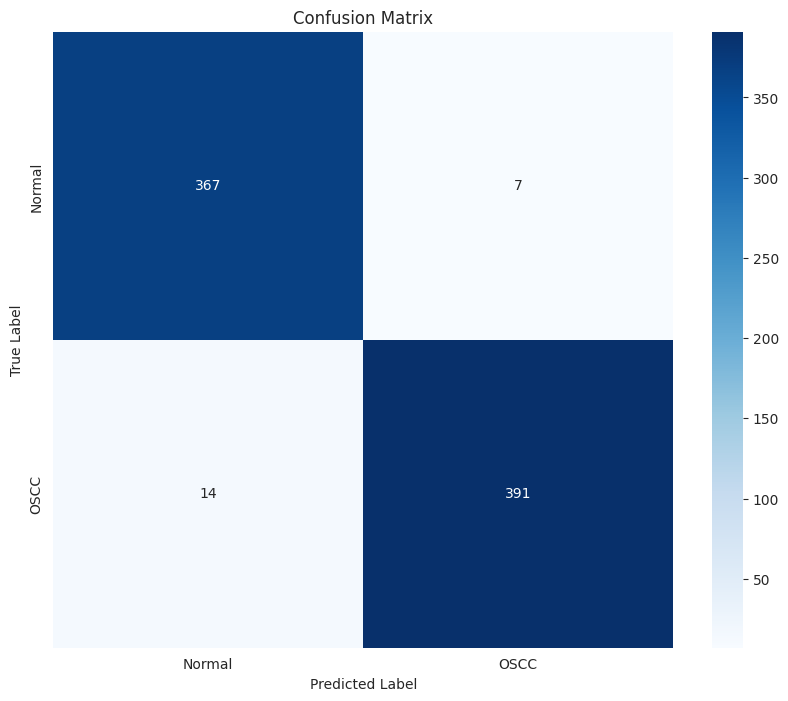

In [ ]:
class_names = list(test_gen.class_indices.keys())

confusion_mtx = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, cmap="Blues", annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

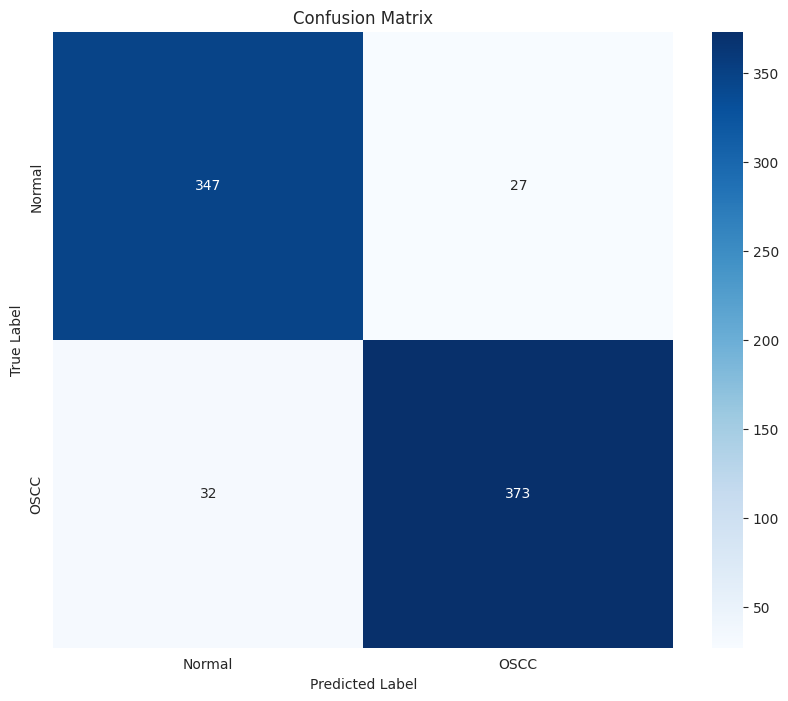

In [ ]:
class_names = list(test_gen.class_indices.keys())

confusion_mtx = confusion_matrix(y_true_labels_resnet, y_pred_labels_resnet)

plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, cmap="Blues", annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

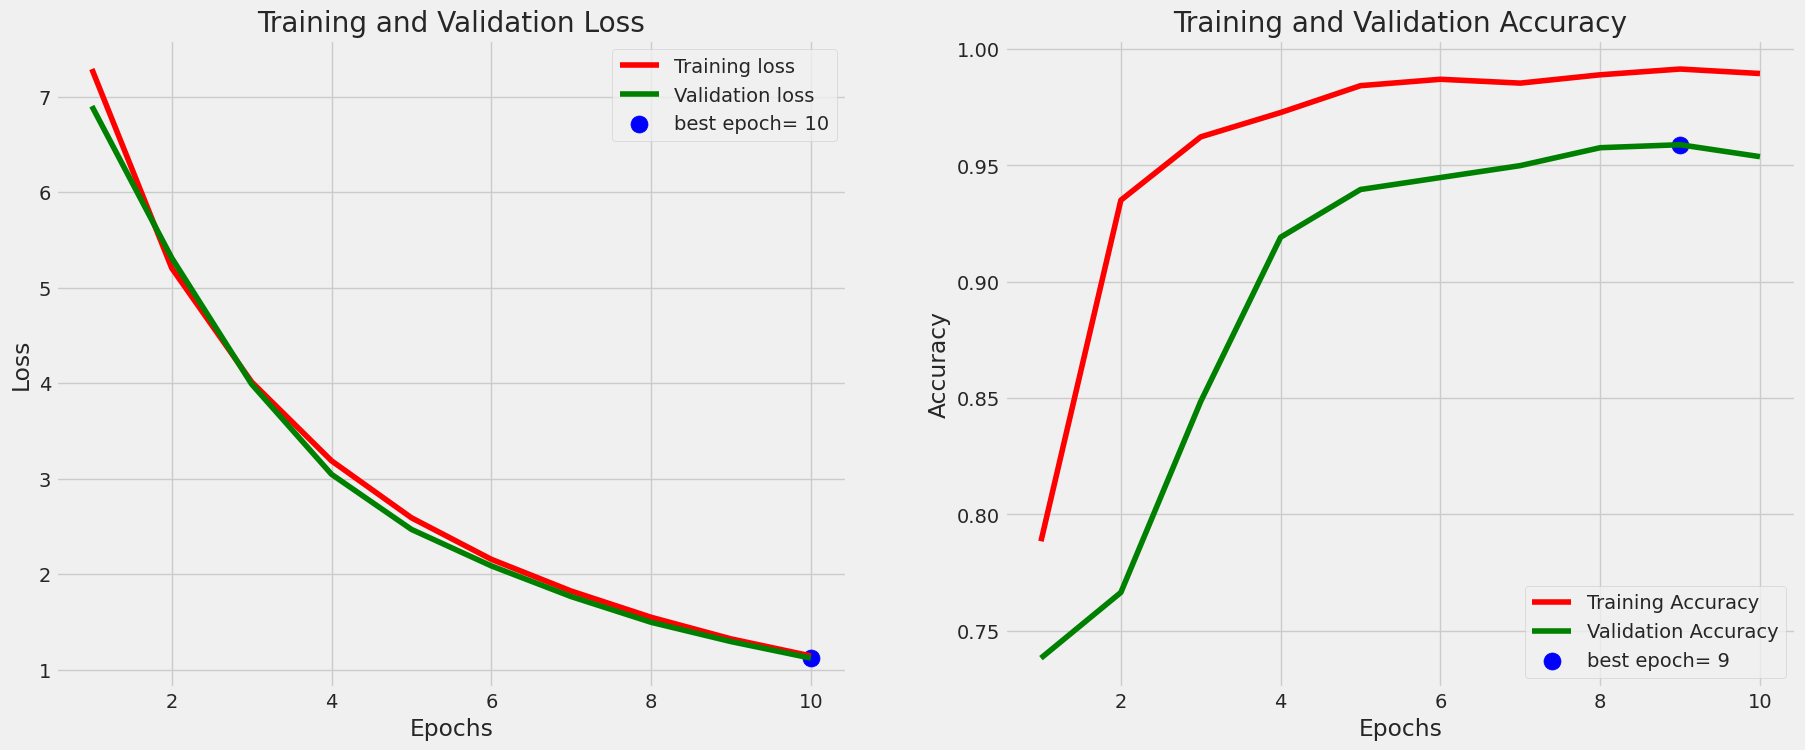

In [ ]:
plot_training(history)

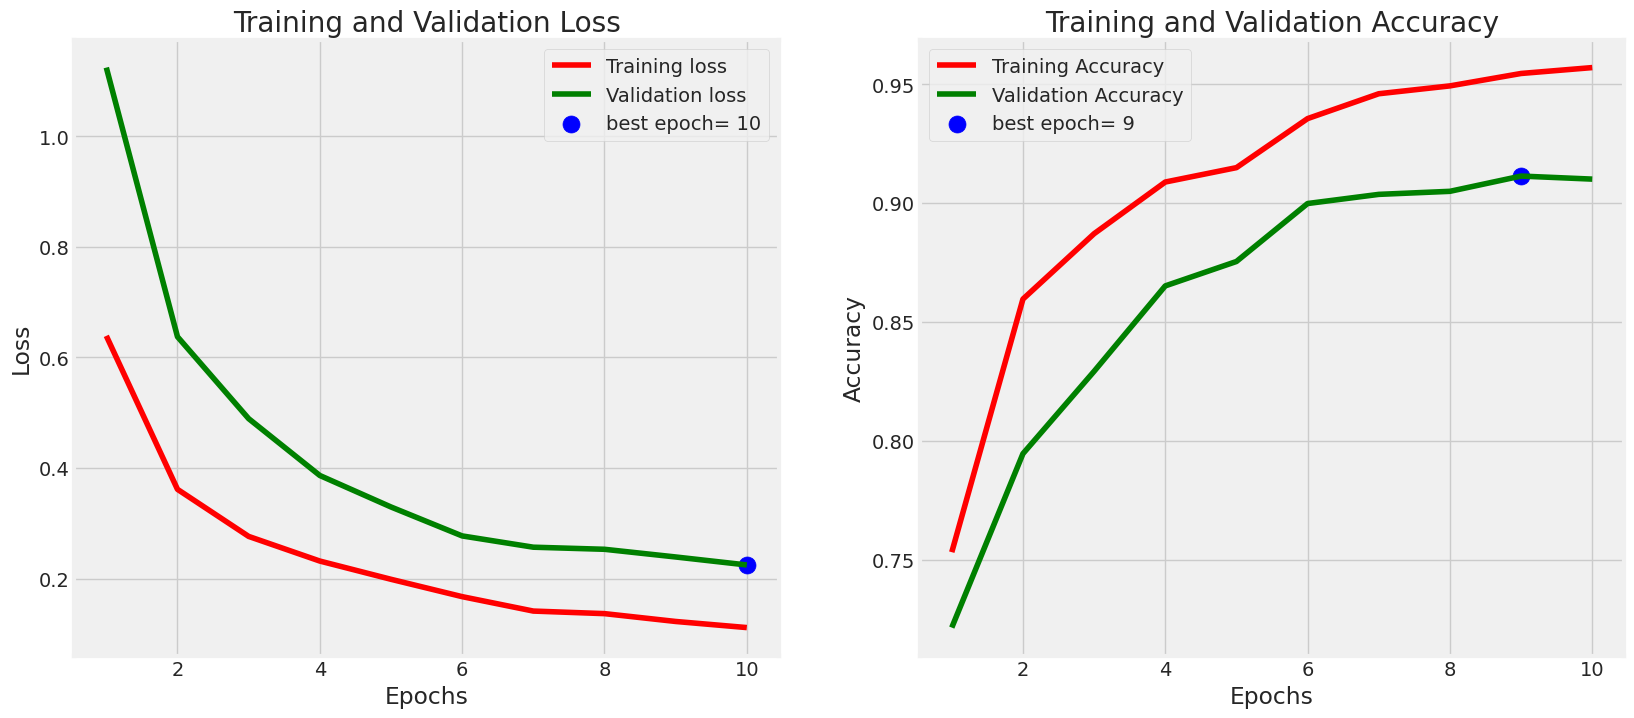

In [ ]:
plot_training(history2)

In [ ]:
history1_2 = ensemble_model.fit(x= train_gen, epochs= epochs, verbose= 1, callbacks= [early_stopping,plateau],
                    validation_data = valid_gen, validation_steps= None, shuffle= False)

Epoch 1/10
29/29 [==============================] - 432s 14s/step - loss: 1.0416 - accuracy: 0.9562 - val_loss: 0.9695 - val_accuracy: 0.9076 - lr: 0.0010
Epoch 2/10
29/29 [==============================] - 390s 13s/step - loss: 0.6918 - accuracy: 0.9838 - val_loss: 0.6749 - val_accuracy: 0.9487 - lr: 0.0010
Epoch 3/10
29/29 [==============================] - 392s 14s/step - loss: 0.5146 - accuracy: 0.9898 - val_loss: 0.5110 - val_accuracy: 0.9602 - lr: 0.0010
Epoch 4/10
29/29 [==============================] - 389s 13s/step - loss: 0.3970 - accuracy: 0.9931 - val_loss: 0.4171 - val_accuracy: 0.9576 - lr: 0.0010
Epoch 5/10
29/29 [==============================] - 391s 13s/step - loss: 0.3214 - accuracy: 0.9920 - val_loss: 0.3437 - val_accuracy: 0.9653 - lr: 0.0010
Epoch 6/10
29/29 [==============================] - 392s 13s/step - loss: 0.2625 - accuracy: 0.9953 - val_loss: 0.2968 - val_accuracy: 0.9743 - lr: 0.0010
Epoch 7/10
29/29 [==============================] - 389s 13s/step - lo

In [ ]:
ts_length = len(test_df)
test_batch_size = test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = ensemble_model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = ensemble_model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = ensemble_model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

 7/19 [==========>...................] - ETA: 49s - loss: 0.2166 - accuracy: 0.9718 

19/19 [==============================] - 26s 1s/step - loss: 0.1798 - accuracy: 0.9769
Train Loss:  0.13001014292240143
Train Accuracy:  0.9950658082962036
--------------------
Validation Loss:  0.21659937500953674
Validation Accuracy:  0.9717586636543274
--------------------
Test Loss:  0.17981690168380737
Test Accuracy:  0.976893424987793


In [ ]:
y_pred_1 = ensemble_model.predict(test_gen)

y_pred_labels_1 = np.argmax(y_pred_1, axis=1)

y_true_labels_1 = test_gen.classes

19/19 [==============================] - 25s 1s/step


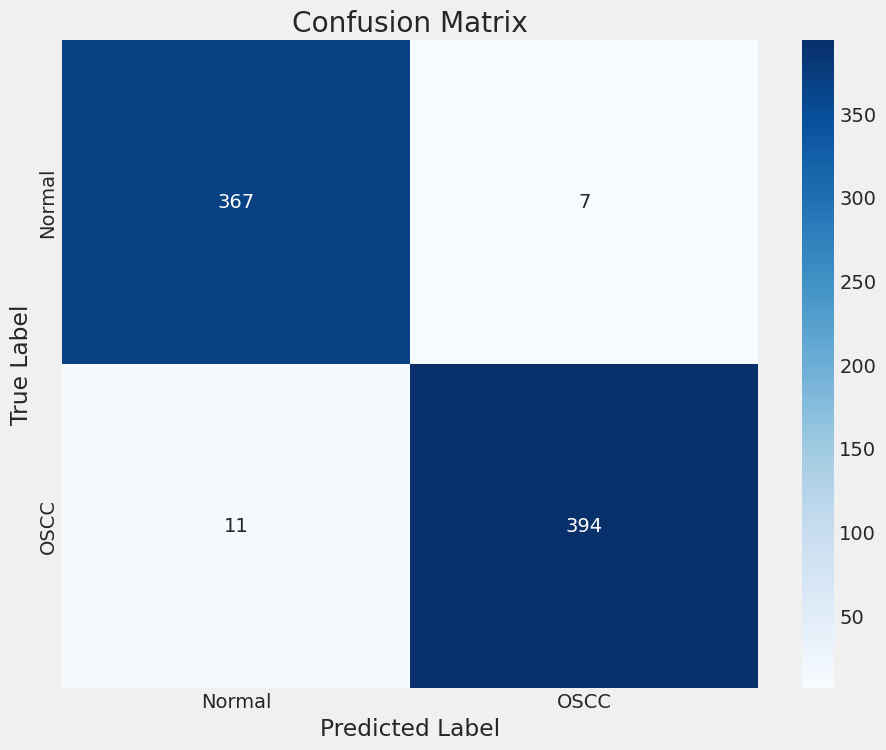

In [ ]:
class_names = list(test_gen.class_indices.keys())

confusion_mtx = confusion_matrix(y_true_labels_1, y_pred_labels_1)

plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, cmap="Blues", annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

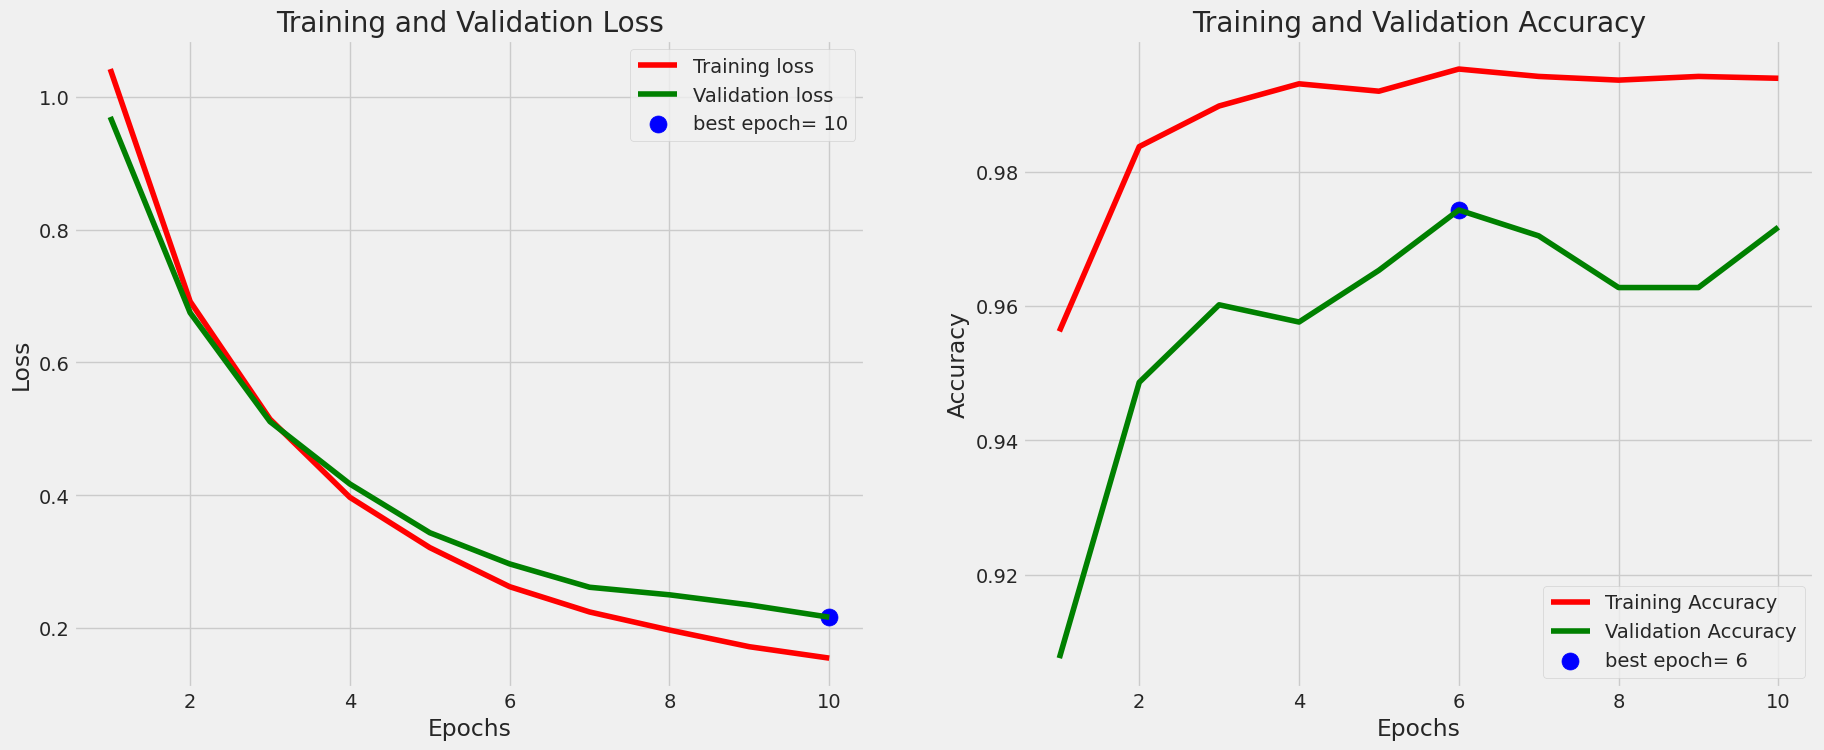

In [ ]:
plot_training(history1_2)


In [ ]:
history_inception_model = inception_model.fit(x= train_gen, epochs= epochs, verbose= 1, callbacks= [early_stopping,plateau],
                    validation_data = valid_gen, validation_steps= None, shuffle= False)

Epoch 1/10
29/29 [==============================] - 159s 5s/step - loss: 0.7998 - accuracy: 0.7485 - val_loss: 122532.2422 - val_accuracy: 0.5199 - lr: 0.0010
Epoch 2/10
29/29 [==============================] - 139s 5s/step - loss: 0.5816 - accuracy: 0.8566 - val_loss: 3.5655 - val_accuracy: 0.5237 - lr: 0.0010
Epoch 3/10
29/29 [==============================] - 137s 5s/step - loss: 0.5315 - accuracy: 0.8525 - val_loss: 3.6250 - val_accuracy: 0.5199 - lr: 0.0010
Epoch 4/10
29/29 [==============================] - 138s 5s/step - loss: 0.3401 - accuracy: 0.8784 - val_loss: 5.5064 - val_accuracy: 0.5199 - lr: 0.0010
Epoch 5/10
29/29 [==============================] - 138s 5s/step - loss: 0.3279 - accuracy: 0.8974 - val_loss: 4866.6826 - val_accuracy: 0.5237 - lr: 0.0010
Epoch 6/10
29/29 [==============================] - 136s 5s/step - loss: 0.1626 - accuracy: 0.9331 - val_loss: 4.5291 - val_accuracy: 0.6881 - lr: 0.0010
Epoch 7/10
29/29 [==============================] - 136s 5s/step - l

In [ ]:
ts_length = len(test_df)
test_batch_size = test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = inception_model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = inception_model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = inception_model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

 7/19 [==========>...................] - ETA: 12s - loss: 0.2040 - accuracy: 0.9281

19/19 [==============================] - 7s 358ms/step - loss: 0.1851 - accuracy: 0.9384
Train Loss:  0.14559078216552734
Train Accuracy:  0.9757401347160339
--------------------
Validation Loss:  0.20398467779159546
Validation Accuracy:  0.9281129837036133
--------------------
Test Loss:  0.1851232349872589
Test Accuracy:  0.9383825659751892


In [ ]:
y_pred_2 = inception_model.predict(test_gen)

y_pred_labels_2 = np.argmax(y_pred_2, axis=1)

y_true_labels_2 = test_gen.classes

19/19 [==============================] - 9s 378ms/step


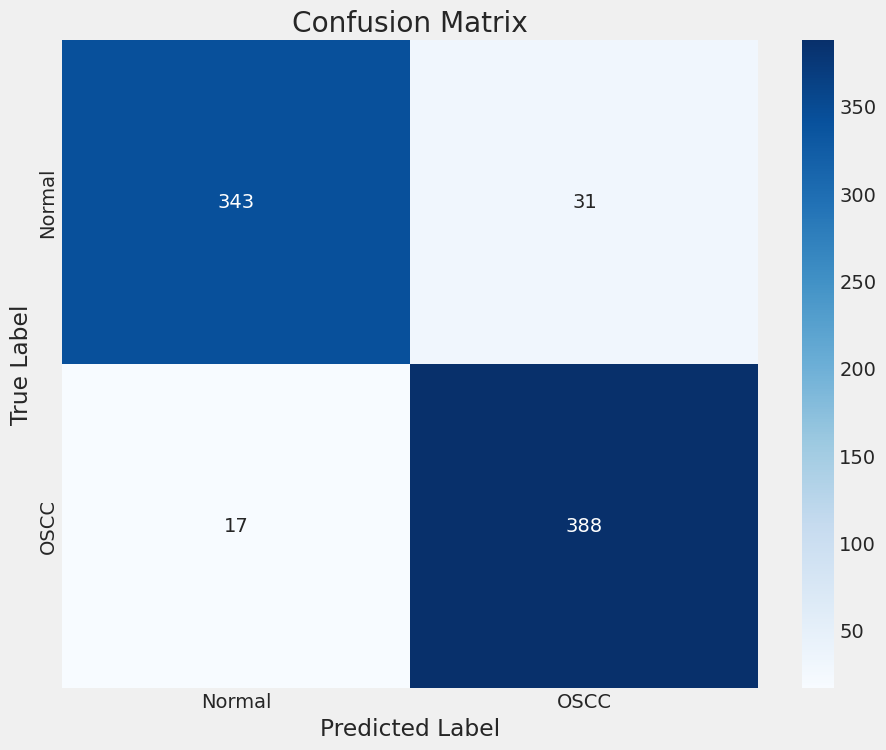

In [ ]:
class_names = list(test_gen.class_indices.keys())

confusion_mtx = confusion_matrix(y_true_labels_2, y_pred_labels_2)

plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, cmap="Blues", annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

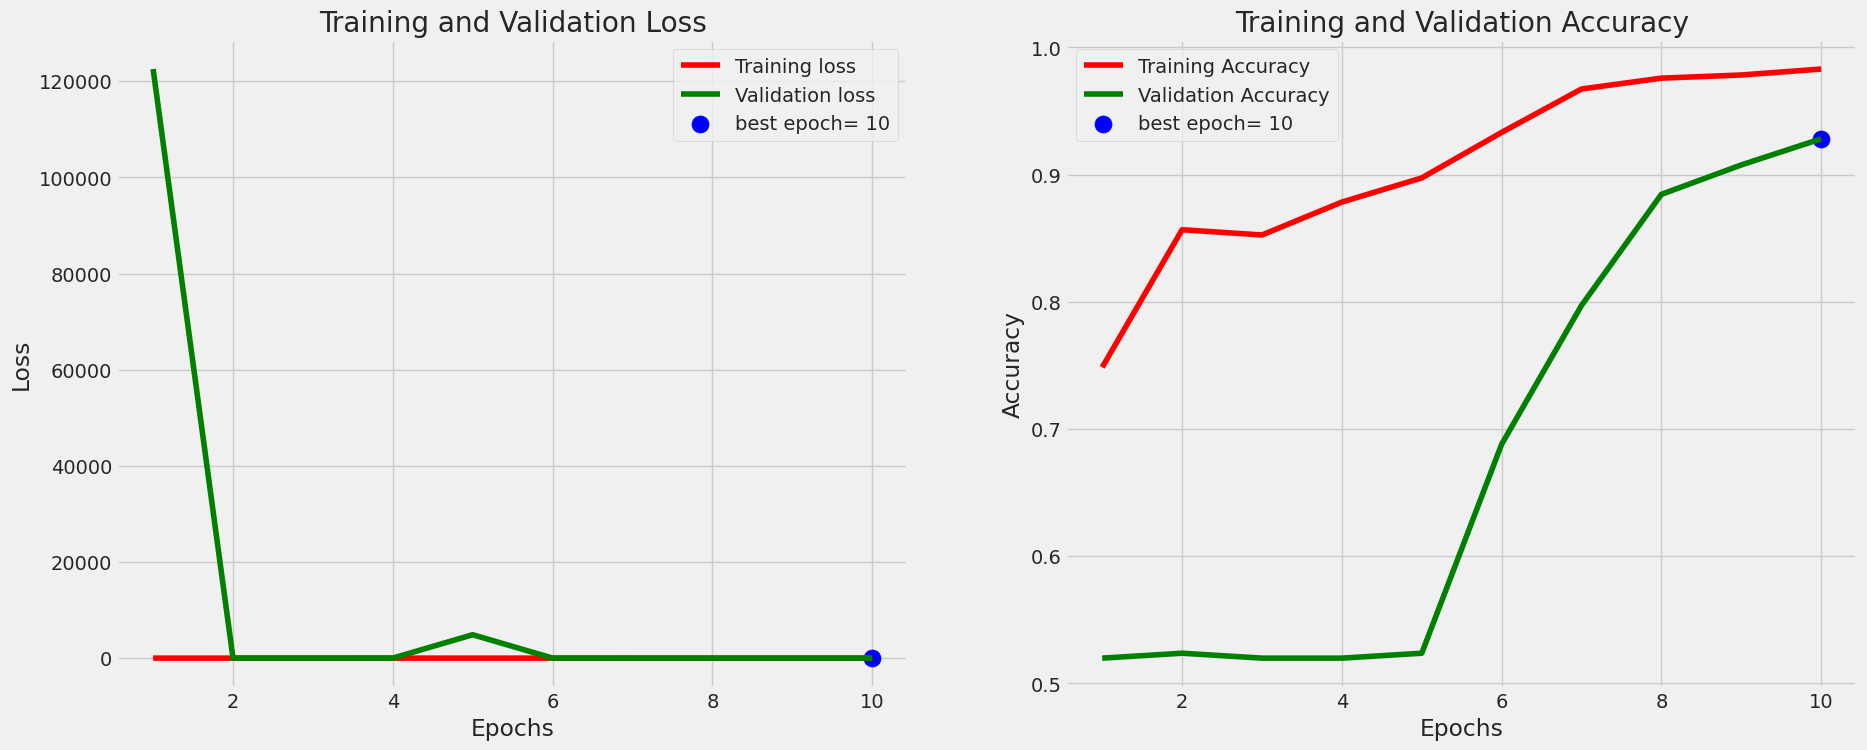

In [ ]:
plot_training(history_inception_model)

In [ ]:
train_dir_1 = data_path
valid_dir_1 = ""
test_dir_1 = ""

try:
    # Get splitted data
    train_df, valid_df, test_df = split_data(train_dir, valid_dir, test_dir)

    # Get Generators
    batch_size = 16
    train_gen_1, valid_gen_1, test_gen_1 = create_model_data(train_df, valid_df, test_df, batch_size)

except:
    print('Invalid Input')

Found 3634 validated image filenames belonging to 2 classes.
Found 779 validated image filenames belonging to 2 classes.
Found 779 validated image filenames belonging to 2 classes.


In [ ]:
history_denseNet_model = densenet_model.fit(x= train_gen_1, epochs= epochs, verbose= 1, callbacks= [early_stopping,plateau],
                    validation_data = valid_gen_1, validation_steps= None, shuffle= False)

Epoch 1/10
228/228 [==============================] - 127s 382ms/step - loss: 0.8346 - accuracy: 0.6907 - val_loss: 0.6199 - val_accuracy: 0.6534 - lr: 0.0010
Epoch 2/10
228/228 [==============================] - 66s 291ms/step - loss: 0.6938 - accuracy: 0.7023 - val_loss: 1.7919 - val_accuracy: 0.6624 - lr: 0.0010
Epoch 3/10
228/228 [==============================] - 77s 336ms/step - loss: 0.5529 - accuracy: 0.7292 - val_loss: 0.6239 - val_accuracy: 0.7035 - lr: 0.0010
Epoch 4/10
228/228 [==============================] - 66s 290ms/step - loss: 0.5351 - accuracy: 0.7438 - val_loss: 0.6526 - val_accuracy: 0.7112 - lr: 0.0010
Epoch 5/10
228/228 [==============================] - 72s 316ms/step - loss: 0.4729 - accuracy: 0.7793 - val_loss: 1.5506 - val_accuracy: 0.6688 - lr: 0.0010
Epoch 6/10
228/228 [==============================] - 57s 251ms/step - loss: 0.4431 - accuracy: 0.7955 - val_loss: 0.4130 - val_accuracy: 0.8216 - lr: 2.0000e-04
Epoch 7/10
228/228 [===========================

In [ ]:
ts_length = len(test_df)
test_batch_size = test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = densenet_model.evaluate(train_gen_1, steps= test_steps, verbose= 1)
valid_score = densenet_model.evaluate(valid_gen_1, steps= test_steps, verbose= 1)
test_score = densenet_model.evaluate(test_gen_1, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

19/19 [==============================] - 12s 372ms/step - loss: 0.2571 - accuracy: 0.8832
Train Loss:  0.2631126344203949
Train Accuracy:  0.8684210777282715
--------------------
Validation Loss:  0.25646936893463135
Validation Accuracy:  0.8881579041481018
--------------------
Test Loss:  0.2571210265159607
Test Accuracy:  0.8831835389137268


In [ ]:
y_pred_ds = densenet_model.predict(test_gen_1)

y_pred_labels_ds = np.argmax(y_pred_ds, axis=1)

y_true_labels_ds = test_gen_1.classes

19/19 [==============================] - 8s 308ms/step


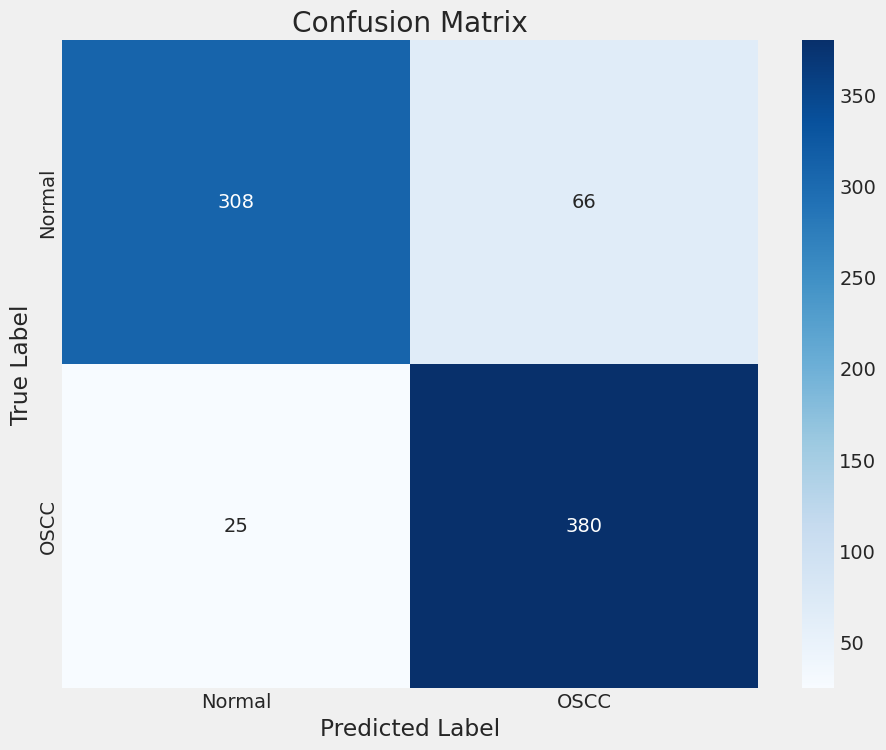

In [ ]:
class_names = list(test_gen_1.class_indices.keys())

confusion_mtx = confusion_matrix(y_true_labels_ds, y_pred_labels_ds)

plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, cmap="Blues", annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

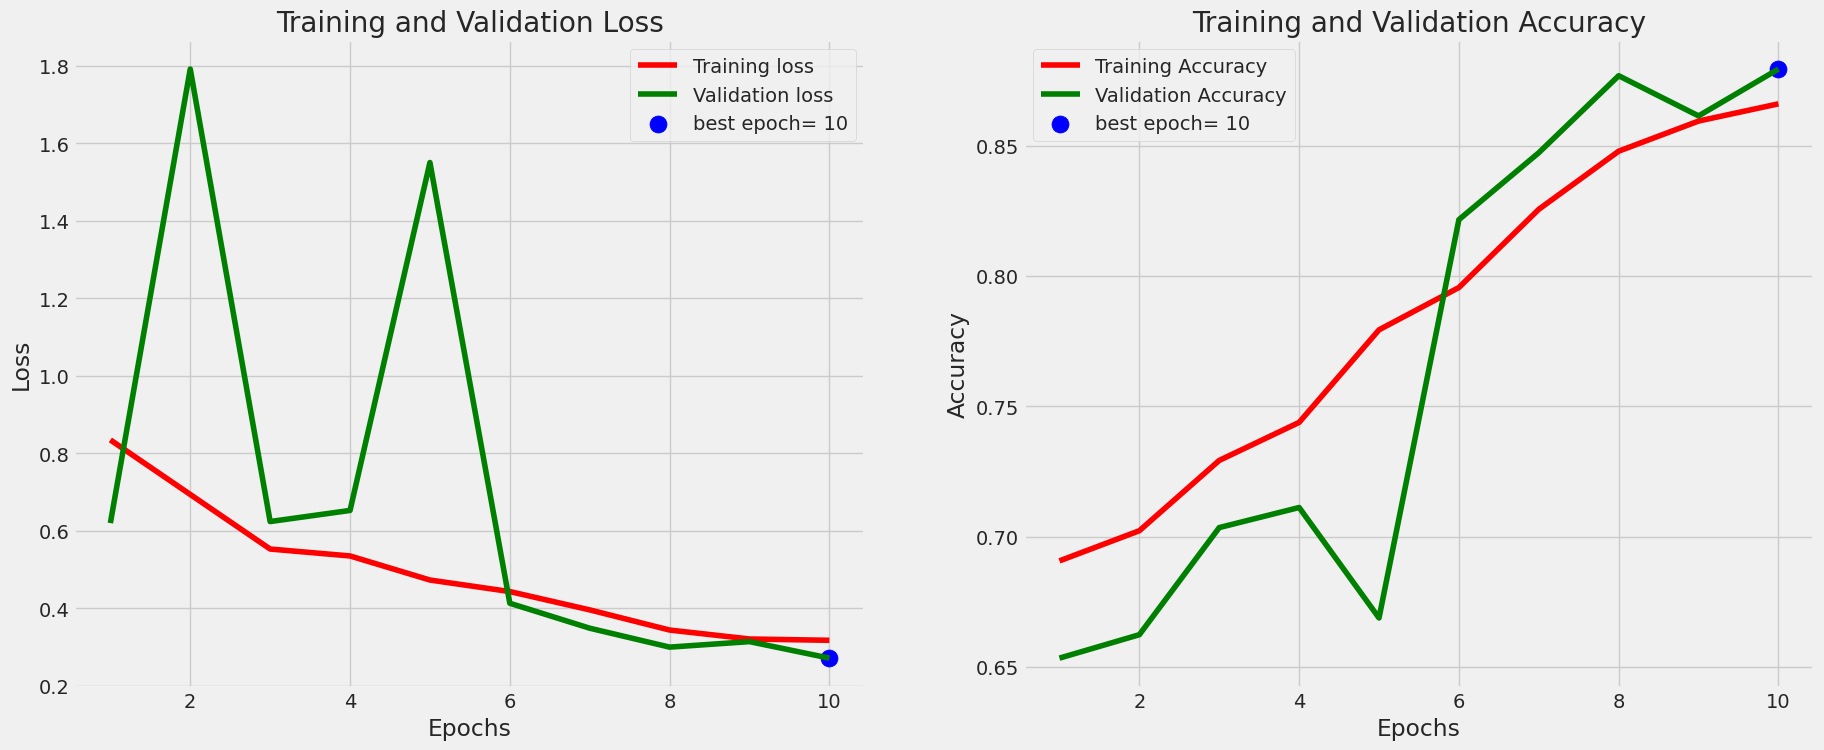

In [ ]:
plot_training(history_denseNet_model)

In [ ]:
history_inception_model_01 = inception_model.fit(x= train_gen, epochs= epochs, verbose= 1, callbacks= [early_stopping,plateau],
                    validation_data = valid_gen, validation_steps= None, shuffle= False)

Epoch 1/10
 89/228 [==========>...................] - ETA: 27s - loss: 0.4388 - accuracy: 0.8364

In [ ]:
input_layer = Input(shape=img_shape)

# Get the output of each model
densenet_output = densenet_model(input_layer)
inception_output = inception_model(input_layer)

# Define weights for the ensemble
weight_densenet = 0.5
weight_inception = 0.5

# Combine predictions with weighted voting
ensemble_output_01 = weight_densenet * densenet_output + inception_output * weight_inception

# Create the ensemble model
ensemble_model_01 = Model(inputs=input_layer, outputs=ensemble_output_01)

# Compile the ensemble model
ensemble_model_01.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

ensemble_model_01.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 sequential_2 (Sequential)   (None, 2)                    7304514   ['input_5[0][0]']             
                                                                                                  
 sequential_3 (Sequential)   (None, 2)                    2233603   ['input_5[0][0]']             
                                                          4                                       
                                                                                                  
 tf.math.multiply (TFOpLamb  (None, 2)                    0         ['sequential_2[0][0]']    

In [ ]:
history_ensemble_model_01 = ensemble_model_01.fit(x= train_gen_1, epochs= epochs, verbose= 1, callbacks= [early_stopping,plateau],
                    validation_data = valid_gen, validation_steps= None, shuffle= False)

Epoch 1/10
228/228 [==============================] - 176s 381ms/step - loss: 0.3998 - accuracy: 0.8269 - val_loss: 0.3585 - val_accuracy: 0.8524 - lr: 0.0010
Epoch 2/10
228/228 [==============================] - 82s 358ms/step - loss: 0.3447 - accuracy: 0.8649 - val_loss: 0.4469 - val_accuracy: 0.7843 - lr: 0.0010
Epoch 3/10
228/228 [==============================] - 83s 363ms/step - loss: 0.3429 - accuracy: 0.8577 - val_loss: 0.3188 - val_accuracy: 0.8819 - lr: 0.0010
Epoch 4/10
228/228 [==============================] - 85s 370ms/step - loss: 0.3179 - accuracy: 0.8709 - val_loss: 0.2925 - val_accuracy: 0.8806 - lr: 0.0010
Epoch 5/10
228/228 [==============================] - 85s 372ms/step - loss: 0.3001 - accuracy: 0.8806 - val_loss: 0.3726 - val_accuracy: 0.8383 - lr: 0.0010
Epoch 6/10
228/228 [==============================] - 94s 410ms/step - loss: 0.2877 - accuracy: 0.8836 - val_loss: 0.2726 - val_accuracy: 0.8896 - lr: 0.0010
Epoch 7/10
228/228 [==============================]

In [ ]:
ts_length = len(test_df)
test_batch_size = test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = ensemble_model_01.evaluate(train_gen_1, steps= test_steps, verbose= 1)
valid_score = ensemble_model_01.evaluate(valid_gen_1, steps= test_steps, verbose= 1)
test_score = ensemble_model_01.evaluate(test_gen_1, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

19/19 [==============================] - 10s 343ms/step - loss: 0.2056 - accuracy: 0.9101
Train Loss:  0.15705697238445282
Train Accuracy:  0.9407894611358643
--------------------
Validation Loss:  0.2391315996646881
Validation Accuracy:  0.8980262875556946
--------------------
Test Loss:  0.20563878118991852
Test Accuracy:  0.9101412296295166


In [ ]:
y_pred_es = ensemble_model_01.predict(test_gen_1)

y_pred_labels_es = np.argmax(y_pred_es, axis=1)

y_true_labels_es = test_gen_1.classes

19/19 [==============================] - 10s 348ms/step


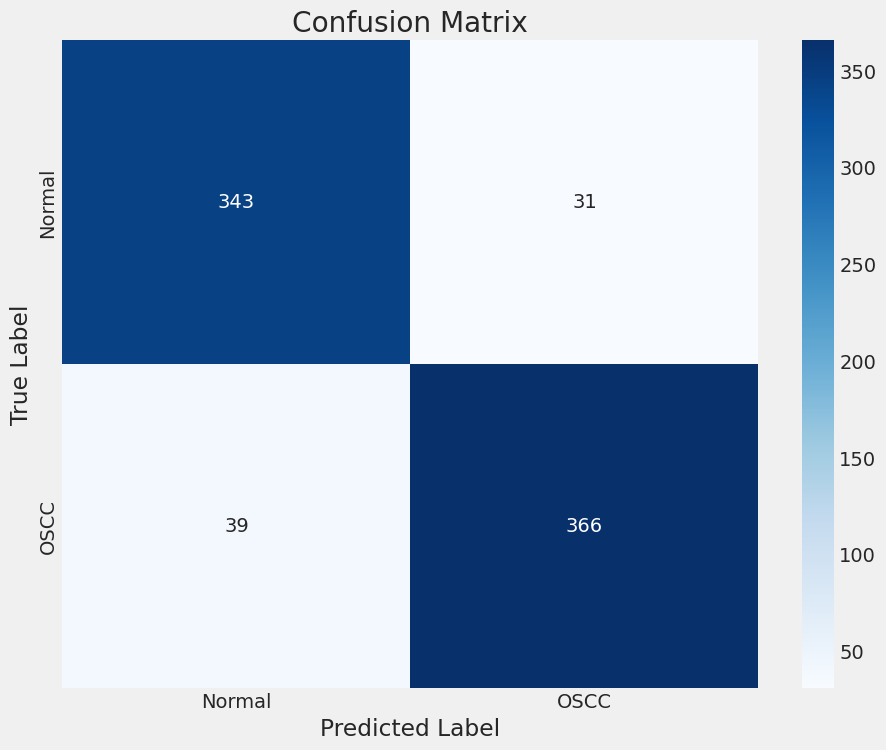

In [ ]:
class_names = list(test_gen_1.class_indices.keys())

confusion_mtx = confusion_matrix(y_true_labels_es, y_pred_labels_es)

plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, cmap="Blues", annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

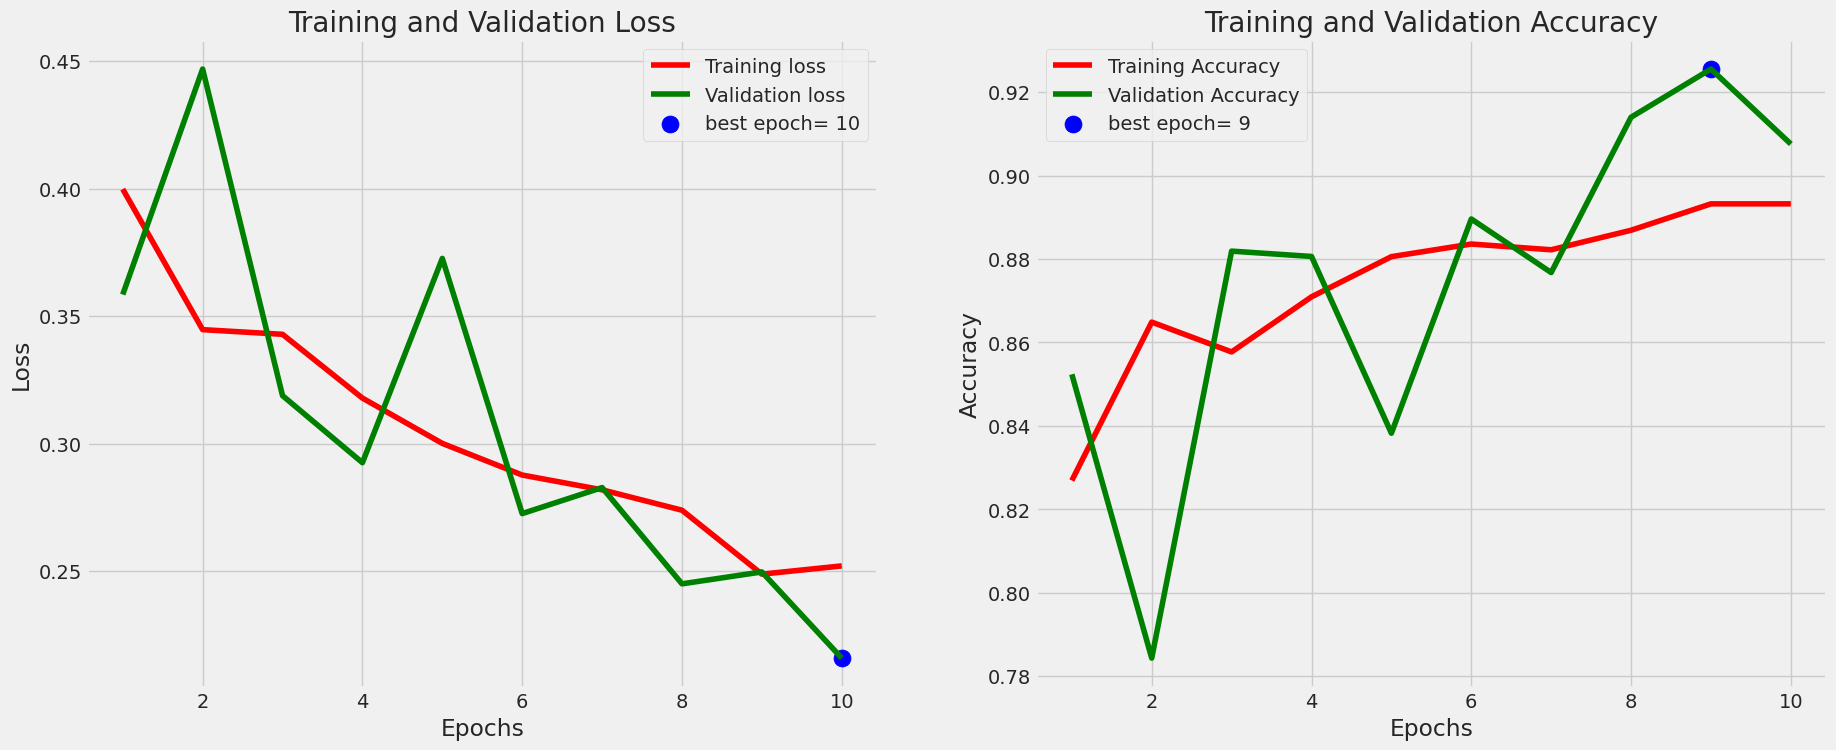

In [ ]:
plot_training(history_ensemble_model_01)